In [13]:
import pandas as pd

import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Classical ML models
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Deep Learning (Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [4]:
data = pd.read_csv('four_qubit_classical.csv')
 
class_mapping = {'GE': 0, 'ABC-D':1 , 'ACD-B':2, 'ABD-C':3, 'BCD-A':4,
                  'A-B-CD':5, 'A-C-BD':6, 'A-D-BC':7, 'SP':8  
                }
data['entanglement_class'] = data['entanglement_class'].map(class_mapping)

data

,sv_0,sv_1,sv_2,sv_3,sv_4,sv_5,sv_6,sv_7,sv_8,sv_9,sv_10,sv_11,sv_12,sv_13,sv_14,sv_15,entanglement_class
0,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.707107,-0.000032,-3.210260e-05,1.457456e-09,5
1,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.707107,-0.000031,-3.053694e-05,1.318760e-09,5
2,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.707107,-0.000029,-2.904763e-05,1.193264e-09,5
3,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.707107,-0.000028,-2.763096e-05,1.079710e-09,5
4,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.707107,-0.000026,-2.628338e-05,9.769618e-10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,0.707107,0.0,0.0,0.0,0.0,0.707073,0.0,-0.000034,0.0,0.0,0.004885,-0.000034,0.004885,-0.000034,-2.331468e-07,1.610738e-09,8
8396,0.707107,0.0,0.0,0.0,0.0,0.707073,0.0,-0.000033,0.0,0.0,0.004860,-0.000033,0.004860,-0.000033,-2.296758e-07,1.578843e-09,8
8397,0.707107,0.0,0.0,0.0,0.0,0.707074,0.0,-0.000033,0.0,0.0,0.004836,-0.000033,0.004836,-0.000033,-2.262564e-07,1.547580e-09,8
8398,0.707107,0.0,0.0,0.0,0.0,0.707074,0.0,-0.000033,0.0,0.0,0.004812,-0.000033,0.004812,-0.000033,-2.228879e-07,1.516936e-09,8


In [5]:
X = data.iloc[:, 0:16]
y = data.iloc[:,16].values

In [6]:
y

array([5, 5, 5, ..., 8, 8, 8])

In [7]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

print("=== Classical ML Model Results ===\n")

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

=== Classical ML Model Results ===

Logistic Regression: 0.8565
              precision    recall  f1-score   support

           0       0.47      0.69      0.56       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       0.52      1.00      0.69        70
           8       0.35      0.09      0.14       200

    accuracy                           0.86      1680
   macro avg       0.82      0.86      0.82      1680
weighted avg       0.84      0.86      0.84      1680

--------------------------------------------------
SVM (RBF Kernel): 0.8470
              precision    recall  f1-score   support

           0       0.48      0.61      0.54       187
           1       1.00      1.00      1.00   

In [9]:
# Convert labels to categorical if multi-class
num_classes = len(np.unique(y_train))
y_train_dl = to_categorical(y_train, num_classes)
y_test_dl = to_categorical(y_test, num_classes)

# Scale input
scaler = StandardScaler()
X_train_dl = scaler.fit_transform(X_train)
X_test_dl = scaler.transform(X_test)

# Build a simple MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train_dl, y_train_dl, epochs=30, batch_size=16, verbose=1, validation_split=0.2)

# Evaluate
loss, acc = model.evaluate(X_test_dl, y_test_dl)
print(f"Neural Network Accuracy: {acc:.4f}")

Epoch 1/30


/Users/thiru/anaconda3/envs/mlops/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.6967 - loss: 1.1298 - val_accuracy: 0.8222 - val_loss: 0.2816
Epoch 2/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8370 - loss: 0.2977 - val_accuracy: 0.8385 - val_loss: 0.2668
Epoch 3/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8385 - loss: 0.2717 - val_accuracy: 0.8787 - val_loss: 0.2422
Epoch 4/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8460 - loss: 0.2577 - val_accuracy: 0.8795 - val_loss: 0.2351
Epoch 5/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8429 - loss: 0.2526 - val_accuracy: 0.8646 - val_loss: 0.2272
Epoch 6/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8644 - loss: 0.2361 - val_accuracy: 0.8690 - val_loss: 0.2209
Epoch 7/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8671 - loss: 0.2308 - val_accuracy: 0.8802 - val_loss: 0.2183
Epoch 8/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8627 - loss: 0.2277 - val_accurac

In [10]:
results = {}
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

# Add DL model
results['Neural Network'] = acc

print(results)

{'Logistic Regression': 0.856547619047619, 'SVM (RBF Kernel)': 0.8470238095238095, 'Random Forest': 0.7886904761904762, 'Gradient Boosting': 0.8184523809523809, 'Naive Bayes': 0.875, 'K-Nearest Neighbors': 0.8202380952380952, 'Decision Tree': 0.7886904761904762, 'Neural Network': 0.8785714507102966}


In [11]:
def evaluate_model(y_true, y_pred, y_proba=None, average='macro', model_name="Model"):
    print(f"\n📊 Performance of {model_name}")
    print("-" * 50)
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average=average):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average=average):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred, average=average):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC-AUC Score
    if y_proba is not None:
        try:
            classes = np.unique(y_true)
            if len(classes) == 2:
                # Binary classification — use probability of positive class
                roc_auc = roc_auc_score(y_true, y_proba[:, 1])
            else:
                # Multiclass classification — binarize y_true
                y_true_bin = label_binarize(y_true, classes=classes)
                roc_auc = roc_auc_score(y_true_bin, y_proba, multi_class='ovr')
            print(f"ROC-AUC Score: {roc_auc:.4f}")
        except Exception as e:
            print("⚠️ ROC-AUC couldn't be computed (possibly due to format).")
            print("Error:", e)



📊 Performance of Logistic Regression
--------------------------------------------------
Accuracy: 0.8565
Precision: 0.8162
Recall: 0.8639
F1-score: 0.8202

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.69      0.56       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       0.52      1.00      0.69        70
           8       0.35      0.09      0.14       200

    accuracy                           0.86      1680
   macro avg       0.82      0.86      0.82      1680
weighted avg       0.84      0.86      0.84      1680



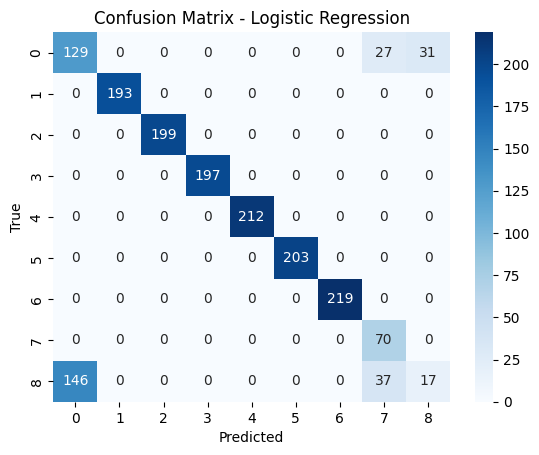

⚠️ ROC-AUC couldn't be computed (possibly due to format).
Error: name 'label_binarize' is not defined

📊 Performance of SVM (RBF Kernel)
--------------------------------------------------
Accuracy: 0.8470
Precision: 0.8033
Recall: 0.8544
F1-score: 0.8039

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.61      0.54       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       0.40      1.00      0.57        70
           8       0.35      0.07      0.12       200

    accuracy                           0.85      1680
   macro avg       0.80      0.85      0.80      1680
weighted avg       0.84      0.85      0.83      1680



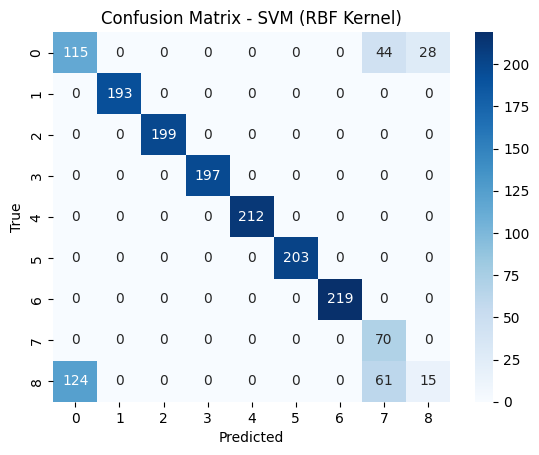

⚠️ ROC-AUC couldn't be computed (possibly due to format).
Error: name 'label_binarize' is not defined

📊 Performance of Random Forest
--------------------------------------------------
Accuracy: 0.7887
Precision: 0.7961
Recall: 0.7962
F1-score: 0.7961

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.09      0.09       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       1.00      1.00      1.00        70
           8       0.08      0.07      0.08       200

    accuracy                           0.79      1680
   macro avg       0.80      0.80      0.80      1680
weighted avg       0.79      0.79      0.79      1680



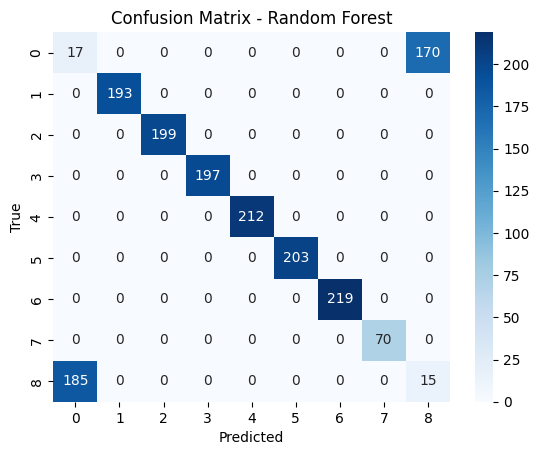

⚠️ ROC-AUC couldn't be computed (possibly due to format).
Error: name 'label_binarize' is not defined

📊 Performance of Gradient Boosting
--------------------------------------------------
Accuracy: 0.8185
Precision: 0.8227
Recall: 0.8256
F1-score: 0.8235

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.31      0.28       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       1.00      1.00      1.00        70
           8       0.16      0.12      0.14       200

    accuracy                           0.82      1680
   macro avg       0.82      0.83      0.82      1680
weighted avg       0.82      0.82      0.82      1680



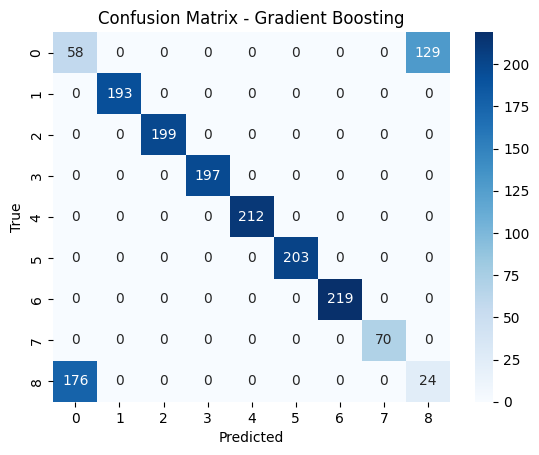

⚠️ ROC-AUC couldn't be computed (possibly due to format).
Error: name 'label_binarize' is not defined

📊 Performance of Naive Bayes
--------------------------------------------------
Accuracy: 0.8750
Precision: 0.8763
Recall: 0.8819
F1-score: 0.8659

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.80      0.59       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       1.00      1.00      1.00        70
           8       0.42      0.14      0.20       200

    accuracy                           0.88      1680
   macro avg       0.88      0.88      0.87      1680
weighted avg       0.87      0.88      0.86      1680



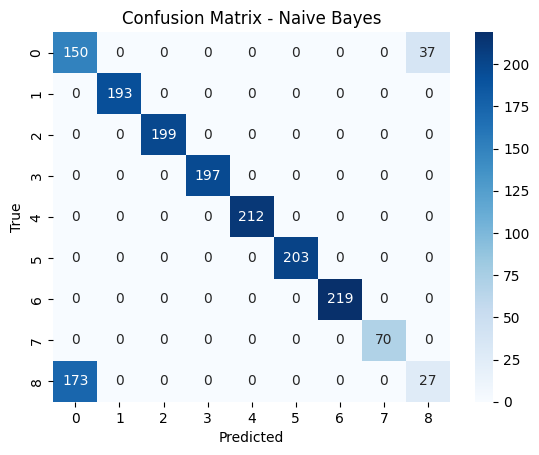

⚠️ ROC-AUC couldn't be computed (possibly due to format).
Error: name 'label_binarize' is not defined

📊 Performance of K-Nearest Neighbors
--------------------------------------------------
Accuracy: 0.8202
Precision: 0.8266
Recall: 0.8266
F1-score: 0.8266

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.22      0.22       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       1.00      1.00      1.00        70
           8       0.23      0.21      0.22       200

    accuracy                           0.82      1680
   macro avg       0.83      0.83      0.83      1680
weighted avg       0.82      0.82      0.82      1680



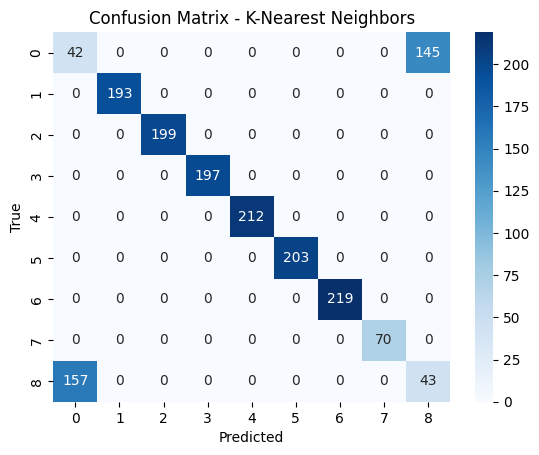

⚠️ ROC-AUC couldn't be computed (possibly due to format).
Error: name 'label_binarize' is not defined

📊 Performance of Decision Tree
--------------------------------------------------
Accuracy: 0.7887
Precision: 0.7951
Recall: 0.7965
F1-score: 0.7957

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.13      0.12       187
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       212
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       219
           7       1.00      1.00      1.00        70
           8       0.04      0.04      0.04       200

    accuracy                           0.79      1680
   macro avg       0.80      0.80      0.80      1680
weighted avg       0.79      0.79      0.79      1680



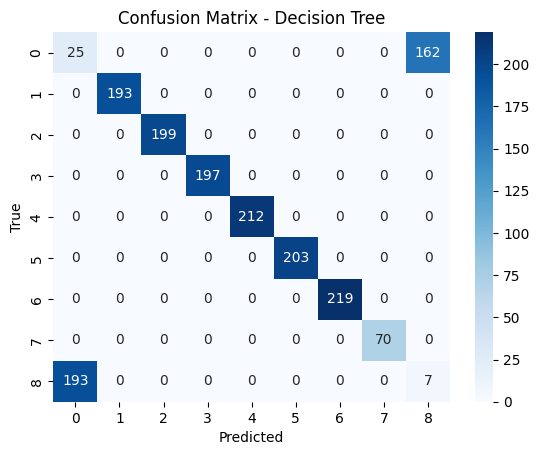

⚠️ ROC-AUC couldn't be computed (possibly due to format).
Error: name 'label_binarize' is not defined


In [12]:
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    try:
        y_proba = pipeline.predict_proba(X_test)
    except AttributeError:
        y_proba = None
    
    evaluate_model(y_test, y_pred, y_proba=y_proba, model_name=name)